In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Limpiar el dataset

In [7]:
data  = pd.read_csv(r"./train.csv")
test = pd.read_csv(r"./test.csv")
len(data[data['Selling_Price']<0])

14

In [8]:
data=data[data['Selling_Price']>=0]

In [9]:
data.isnull().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       206
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       37
charges_1           197
charges_2 (%)       204
Minimum_price        38
Maximum_price       340
Selling_Price         0
dtype: int64

### Reemplaza nan con valores medios

In [10]:
data['Discount_avail'].fillna(data['Discount_avail'].mean(),inplace=True)
data['Minimum_price'].fillna(data['Minimum_price'].mean(),inplace=True)
data['Maximum_price'].fillna(data['Maximum_price'].mean(),inplace=True)

In [11]:
data['instock_date']= pd.to_datetime(data['instock_date'])
data['year'] = data['instock_date'].dt.year
data['month'] =  data['instock_date'].dt.month
data["day"] = data['instock_date'].dt.day

In [12]:
data.drop(['Product_id','Customer_name','instock_date'],axis=1,inplace=True)

In [13]:
data['Product_Category']=pd.Categorical(data['Product_Category'])
d1 = dict(enumerate(data['Product_Category'].cat.categories))
data['Product_Category']=data.Product_Category.cat.codes

data['Loyalty_customer']=pd.Categorical(data['Loyalty_customer'])
d2 = dict(enumerate(data['Loyalty_customer'].cat.categories))
data['Loyalty_customer']=data.Loyalty_customer.cat.codes

### Matriz de Correlacion

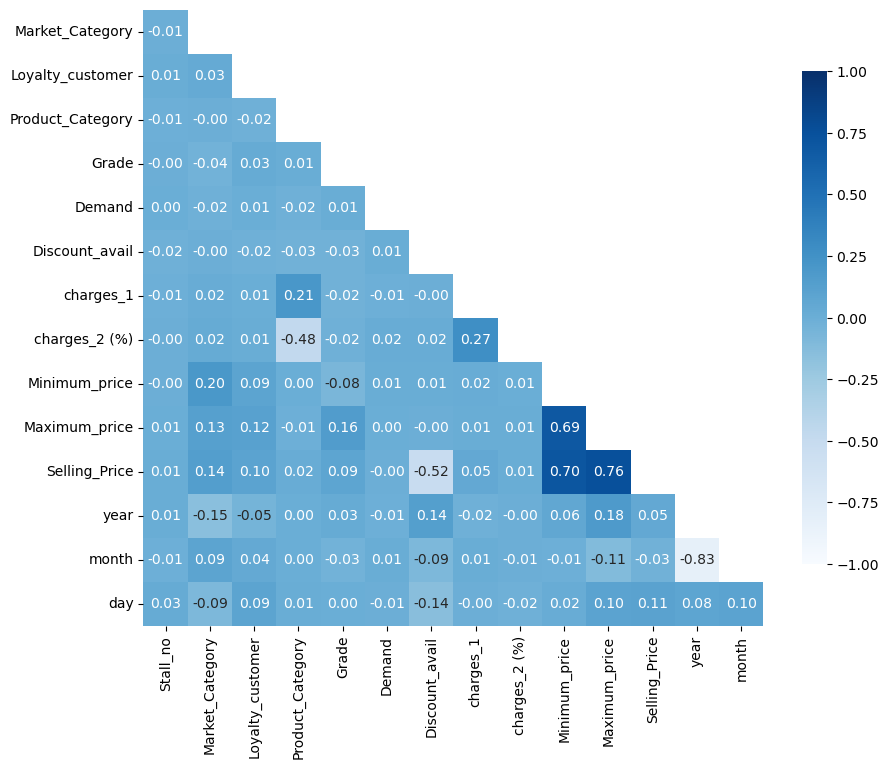

In [16]:
data_corr=data.corr()
np.ones_like(data_corr, dtype=bool)
mask = np.triu(np.ones_like(data_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(data_corr, dtype=bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = data_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [20]:
test_data = pd.read_csv(r"./test.csv")
test_data.isnull().sum()
test_data['Minimum_price'].fillna(test_data['Minimum_price'].mean(),inplace=True)
to_replace = {
    'Product_Category':{'Child_care':0,'Cosmetics':1,'Educational':2,'Fashion':3,'Home_decor':4,'Hospitality':5,'Organic':6,'Pet_care':7,'Repair':8,'Technology':9},
    'Loyalty_customer':{'No ':0,'Yes':1}
}
test_data.replace(to_replace,inplace=True)
test_data['instock_date']= pd.to_datetime(test_data['instock_date'])
test_data['year'] = test_data['instock_date'].dt.year
test_data['month'] =  test_data['instock_date'].dt.month
test_data["day"] = test_data['instock_date'].dt.day
prod_id=test_data['Product_id']

In [21]:
from sklearn import linear_model

In [22]:
test_data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,year,month,day
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,Ivanka,0,3,0,90,0,380.0,16.0,2576.0,3340,2016,1,13
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Isaak,1,3,0,87,0,393.0,16.0,1202.0,1955,2015,8,23
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,Analiese,0,9,2,55,0,493.0,9.0,7175.0,15715,2015,11,14
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Rusty,1,0,3,86,0,303.0,16.0,5404.0,13078,2015,11,21
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,Eloise,0,9,0,27,0,567.0,16.0,4069.0,6244,2015,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17,58,Davion,1,7,0,39,0,117.0,5.0,3094.0,4674,2015,8,15
3426,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47,358,Maiah,1,9,3,17,0,509.0,6.0,3384.0,14105,2015,12,4
3427,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47,106,Gwendolen,1,2,0,36,0,150.0,17.0,710.0,10894,2016,3,28
3428,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36,104,Addilynn,1,0,0,63,0,325.0,15.0,1477.0,5165,2015,5,23


In [23]:
y=data['Selling_Price']
X=data[['Market_Category','Discount_avail','Minimum_price','Maximum_price']]
regr = linear_model.LinearRegression()
regr.fit(X, y)
regr.score(X,y)

0.9063826939489834

In [24]:
regr.coef_

array([ 5.10905419e-02, -4.44288684e+03,  4.85080990e-01,  4.13534703e-01])

In [25]:
prediction=regr.predict(test_data[['Market_Category','Discount_avail','Minimum_price','Maximum_price']])

In [26]:
prediction=abs(prediction)

In [27]:
data_submission=pd.DataFrame({
    'Product_id': prod_id,
    'Selling_Price': prediction
})

In [30]:
data_submission.to_csv("output.csv",index=False)